$1.1~X_1,\ldots,X_n\sim Beta(a,\,b)$. Построить график функции правдоподобия при разных n, найти на нем ОМП, сравнить с истинным значением параметров. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sb

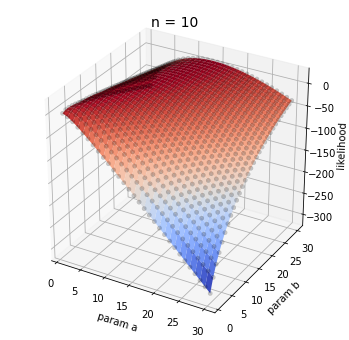

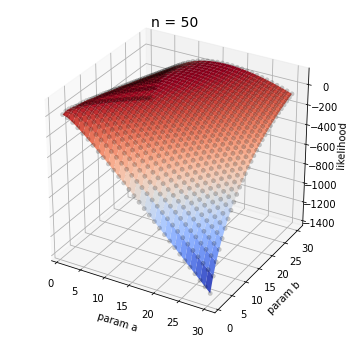

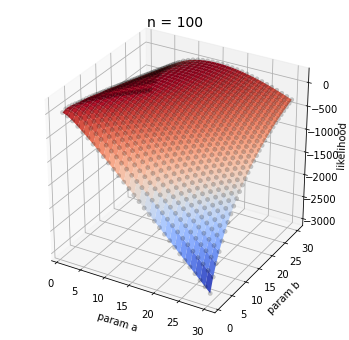

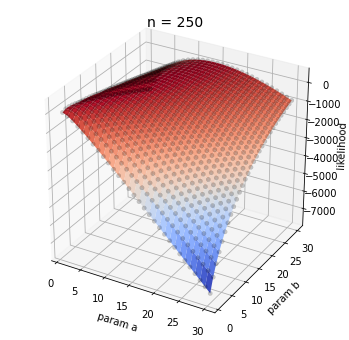

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import beta
from matplotlib import cm

def likehood_f(x, a, b):
    L = 0
    for i in x:
        L = L + np.log(beta.pdf(i,a,b))
    return L


n = [10, 50, 100, 250]

for nn in n:
    a = 7
    b = 13
    x = np.random.beta(a, b, nn)
    a, b = np.mgrid[1:30:30j,1:30:30j]
    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(111, projection='3d', label = 'n')
    ax.plot_surface(a, b, likehood_f(x, a, b), cmap=cm.coolwarm)
    ax.scatter(a, b, likehood_f(x, a, b), color='black', alpha=0.2, linewidths=0.2)
    ax.set_ylabel('param b')
    ax.set_xlabel('param a')
    ax.set_zlabel('likelihood')
    ax.set_title('n = %d' % nn, fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.show()

In [90]:
from scipy import optimize

def likehood_ff(param):
    L = 0
    for i in range(n):
        L = L + np.log(beta.pdf(x[i],param[0],param[1]))
    return -L

a = 3
b = 5
n = 100

x = np.random.beta(a, b, n)

ans = optimize.minimize(likehood_ff, [1,1])
theta1a = ans.x[0]
theta1b = ans.x[1]
theta1 = [theta1a, theta1b]
print("theta1=",theta1)


theta1= [2.571914311838006, 4.145984660713046]


In [17]:
def d_func(param):
    D = np.log(beta.cdf(x[0], param[0], param[1]))
    for j in range(n-2):
        D = D + np.log(beta.cdf(x[j+1], param[0], param[1])-beta.cdf(x[j], param[0], param[1]))
    D = D + np.log(1-beta.cdf(x[n-1], param[0], param[1]))
    return -D

x.sort()

ans = optimize.minimize(d_func, [1,1])
theta2a = ans.x[0]
theta2b = ans.x[1]
theta2 = [theta2a, theta2b]
print("theta2=",theta2)

theta2= [3.119689281812314, 5.362660669073909]


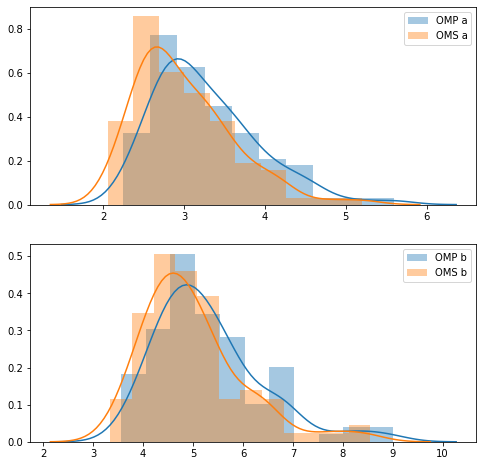

In [18]:
a = 3
b = 5
n = 50

est_a1 = []
est_b1 = []
est_a2 = []
est_b2 = []

for k in range(100):
    x = np.random.beta(a, b, n)
    theta1 = optimize.minimize(likehood_ff, [1,1])
    est_a1.append(theta1.x[0])
    est_b1.append(theta1.x[1])
    
    x.sort()
    
    theta2 = optimize.minimize(d_func, [1,1])
    est_a2.append(theta2.x[0])
    est_b2.append(theta2.x[1])
    
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
sb.distplot(est_a1, label = 'OMP a')
sb.distplot(est_a2, label = 'OMS a')
plt.legend()
plt.subplot(2, 1, 2)
sb.distplot(est_b1, label = 'OMP b')
sb.distplot(est_b2, label = 'OMS b')
plt.legend()
plt.show()

In [22]:
def dist(a, b, c, d):    
    return math.sqrt((a-c)**2 + (b-d)**2)

for n in [10, 20, 30, 100]:
    a = 7
    b = 13
    print(n)
    for i in range(50):
        x = np.random.beta(a, b, n)
        
        theta1 = optimize.minimize(likehood_ff, [1,1])
        a1 = theta1.x[0]
        b1 = theta1.x[1]
    
        x.sort()
    
        theta2 = optimize.minimize(d_func, [1,1])
        a2 = theta2.x[0]
        b2 = theta2.x[1]
        
        compare1 = 0 #сравнение по координате a
        compare2_omp = 0
        compare2_oms = 0
        compare3 = 0 #сравнение в смысле расстояния
        
        if (math.fabs(a - a1) > math.fabs(a - a2)):
            compare1 += 1
        elif (math.fabs(a - a1) < math.fabs(a - a2)):
            compare1 -= 1
            
        elif (max(b1, b2) == b1):
            compare2_omp += 1
        elif (max(b1, b2) == b2):
            compare2_oms += 1
            
        if (dist(a, b, a1, b1) > dist(a, b, a2, b2)):
            compare3 += 1
        elif (dist(a, b, a1, b1) < dist(a, b, a2, b2)):
            compare3 -= 1
            
    if(compare1 > 0):
        print("OMS for param a")
    elif(compare1 < 0):
        print("OMP for param a")
    else:
        print("equiv for param a")
             
    elif (max(compare2_omp, compare2_oms) == compare2_omp):
        print("OMP for param b")
    elif (max(compare2_omp, compare2_oms) == compare2_oms):
        print("OMS for param b")

    if(compare3 > 0):
        print("OMS for distance")
    elif(compare3 < 0):
        print("OMP for distance")
    else:
        print("equiv for distance")


10
OMP for param a
OMP for param b
OMP for distance
20
OMS for param a
OMP for param b
OMS for distance
30
OMP for param a
OMP for param b
OMP for distance
100


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


OMS for param a
OMP for param b
OMS for distance


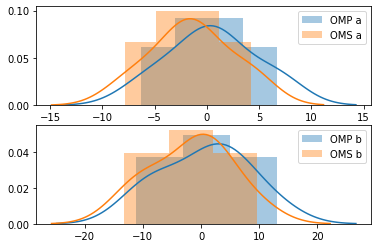

In [24]:
import seaborn as sb
import math

a = 3
b = 5
n = 50

est_a1 = []
est_b1 = []
est_a2 = []
est_b2 = []
for k in range(10):
    x = np.random.beta(a, b, n)
    theta1 = optimize.minimize(likehood_ff, [1,1])
    est_a1.append(math.sqrt(n)*(theta1.x[0]-a))
    est_b1.append(math.sqrt(n)*(theta1.x[1]-b))
    
    x.sort()
    
    theta2 = optimize.minimize(d_func, [1,1])
    est_a2.append(math.sqrt(n)*(theta2.x[0]-a))
    est_b2.append(math.sqrt(n)*(theta2.x[1]-b))
    
plt.subplot(2, 1, 1)
sb.distplot(est_a1, label = 'OMP a')
sb.distplot(est_a2, label = 'OMS a')
plt.legend()
plt.subplot(2, 1, 2)
sb.distplot(est_b1, label = 'OMP b')
sb.distplot(est_b2, label = 'OMS b')
plt.legend()
plt.show()  

$1.3$

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


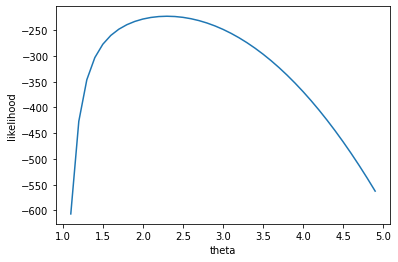

In [86]:
from scipy.stats import bernoulli
from scipy.stats import norm
from scipy.stats import beta

theta = 3
x = []
likelihood = []

for i in range(100):
        step_1 = bernoulli.rvs(0.5, 1)
        if (step_1 == 1):
            x.append(beta.rvs(2, 5, 1))
        else:
            x.append(norm.rvs(theta, math.exp(-(theta)**(-4)), 1))
            
for theta in np.arange(1, 5, 0.1):
    #считаем правдоподобие
    res = 1
    for xx in x:
        temp = 1/2*norm.pdf(xx, theta, math.exp(-(theta)**(-4))) + 1/2*beta.pdf(xx, 2, 5)
        res *= temp
    likelihood.append(np.log(res))
            
x_axis = np.arange(1, 5, 0.1)
plt.plot(x_axis, likelihood)  
plt.xlabel('theta')
plt.ylabel('likelihood')
plt.show()          

In [79]:
from scipy.stats import bernoulli
from scipy.stats import norm
from scipy.stats import beta

theta = 3
x = []
likelihood = []

for i in range(100):
        step_1 = bernoulli.rvs(0.5, 1)
        if (step_1 == 1):
            x.append(beta.rvs(2, 5, 1))
        else:
            x.append(norm.rvs(theta, math.exp(-(theta)**(-4)), 1))
            
for theta in np.arange(1, 10, 0.1):
    #считаем правдоподобие
    res = 1
    for xx in x:
        temp = 1/2*norm.pdf(xx, theta, math.exp(-(theta)**(-4))) + 1/2*beta.pdf(xx, 2, 5)
        res *= temp
    print(res)
    likelihood.append(res)

[1.34265634e-236]
[5.85645278e-140]
[6.41146601e-109]
[2.2942702e-96]
[1.78701681e-90]
[1.78094624e-87]
[5.80208054e-86]
[2.37949987e-85]
[2.24803605e-85]
[6.50173927e-86]
[6.60395984e-87]
[2.5175491e-88]
[3.71585804e-90]
[2.15165579e-92]
[4.90777427e-95]
[4.40739925e-98]
[1.55423583e-101]
[2.14461849e-105]
[1.15356882e-109]
[2.40996584e-114]
[1.94894627e-119]
[6.08332482e-125]
[7.31109632e-131]
[3.37692001e-137]
[5.98729581e-144]
[4.07282195e-151]
[1.06323873e-158]
[1.06634015e-166]
[4.11598632e-175]
[6.12927063e-184]
[3.53085141e-193]
[7.88893945e-203]
[6.85021567e-213]
[2.31410454e-223]
[3.04083037e-234]
[1.55245445e-245]
[3.07386213e-257]
[2.35616206e-269]
[6.98347908e-282]
[8.00403591e-295]
[3.55382708e-308]
[6.13e-322]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
